# Filtrado de imágenes en Python

Es posible hacer operaciones en Python de diferente manera y con distintas librerías, los resultados tendrán pequeñas variaciones según el método que se decida utilizar.

Para este trabajo usaremos las siguientes librerías para ejemplificar esta situación:

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

Ahora se leerá una serie de imágenes y después se establecerá la variable ~im~, sobre la cual se trabajarán los ejemplos posteriores.

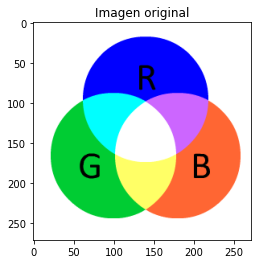

In [2]:
image_color_rgb = cv.imread('im/rgb.png')
image_salt_pepper = cv.imread('im/salt_pepper.png')
im = image_color_rgb
plt.imshow(im)
plt.title("Imagen original")
plt.show()

## Cambiar la imagen a escala de grises


Este primer intento no funciona muy bien

In [3]:
grayscale = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

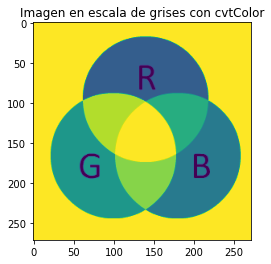

True

In [4]:
plt.imshow(grayscale)
plt.title("Imagen en escala de grises con cvtColor")
plt.show()
cv.imwrite('out/gs-cvt.png', grayscale)

Escala de grises con un solo canal B,G,R -> 0,1,2

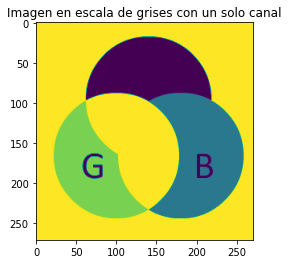

True

In [5]:
grayscale = im[:,:,1]
plt.imshow(grayscale)
plt.title("Imagen en escala de grises con un solo canal")
plt.show()
cv.imwrite('out/gs-1c.png', grayscale)

Promedios que pueden ser:
- Y= 0.114B + 0.587G + 0.299R
- Y= 0.33B + 0.33G + 0.33R

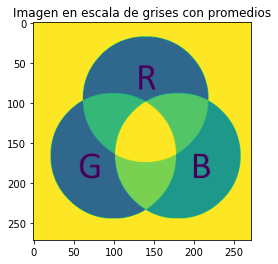

True

In [6]:
grayscale = 0.33*im[:,:,0] + 0.33*im[:,:,1] + 0.33*im[:,:,2]
grayscale = grayscale.astype(np.uint8)
plt.imshow(grayscale)
plt.title("Imagen en escala de grises con promedios")
plt.show()
cv.imwrite('out/gs-p.png', grayscale)

## Filtro de mediana
https://github.com/MeteHanC/Python-Median-Filter/blob/master/MedianFilter.py

In [7]:
def median_filter(data, filter_size):
    """Apply the median filter.
    
    Arguments:
    data -- An array that represents an image.
    filter_size -- An impair integer that represents mask/window size.
    
    Return a filtered array that represents an image.
    """
    if (filter_size % 2) == 0:
        raise TypeError("filter_size must be an impair integer")
    if not isinstance(data, np.ndarray):
        raise TypeError("data must be an array")
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

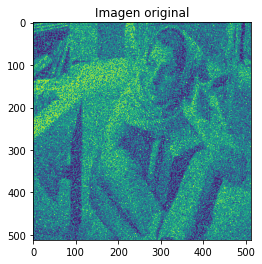

In [8]:
im_noise = Image.open("im/salt_pepper.png").convert("L")
plt.imshow(im_noise)
plt.title("Imagen original")
plt.show()

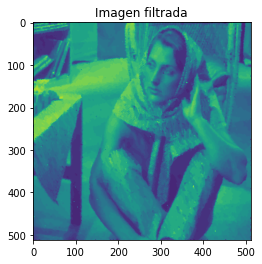

In [9]:
arr = np.array(im_noise)
removed_noise = median_filter(arr, 3) 
im_filtered = Image.fromarray(removed_noise)
plt.imshow(im_filtered)
plt.title("Imagen filtrada")
plt.show()
im_filtered = im_filtered.save("out/filtered.jpg")